stereovision2


/tmp/ipykernel_1355575/2791725424.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  real_img = torch.load(real_data_path)[LOAD_IDX].cpu()
/tmp/ipykernel_1355575/279172542

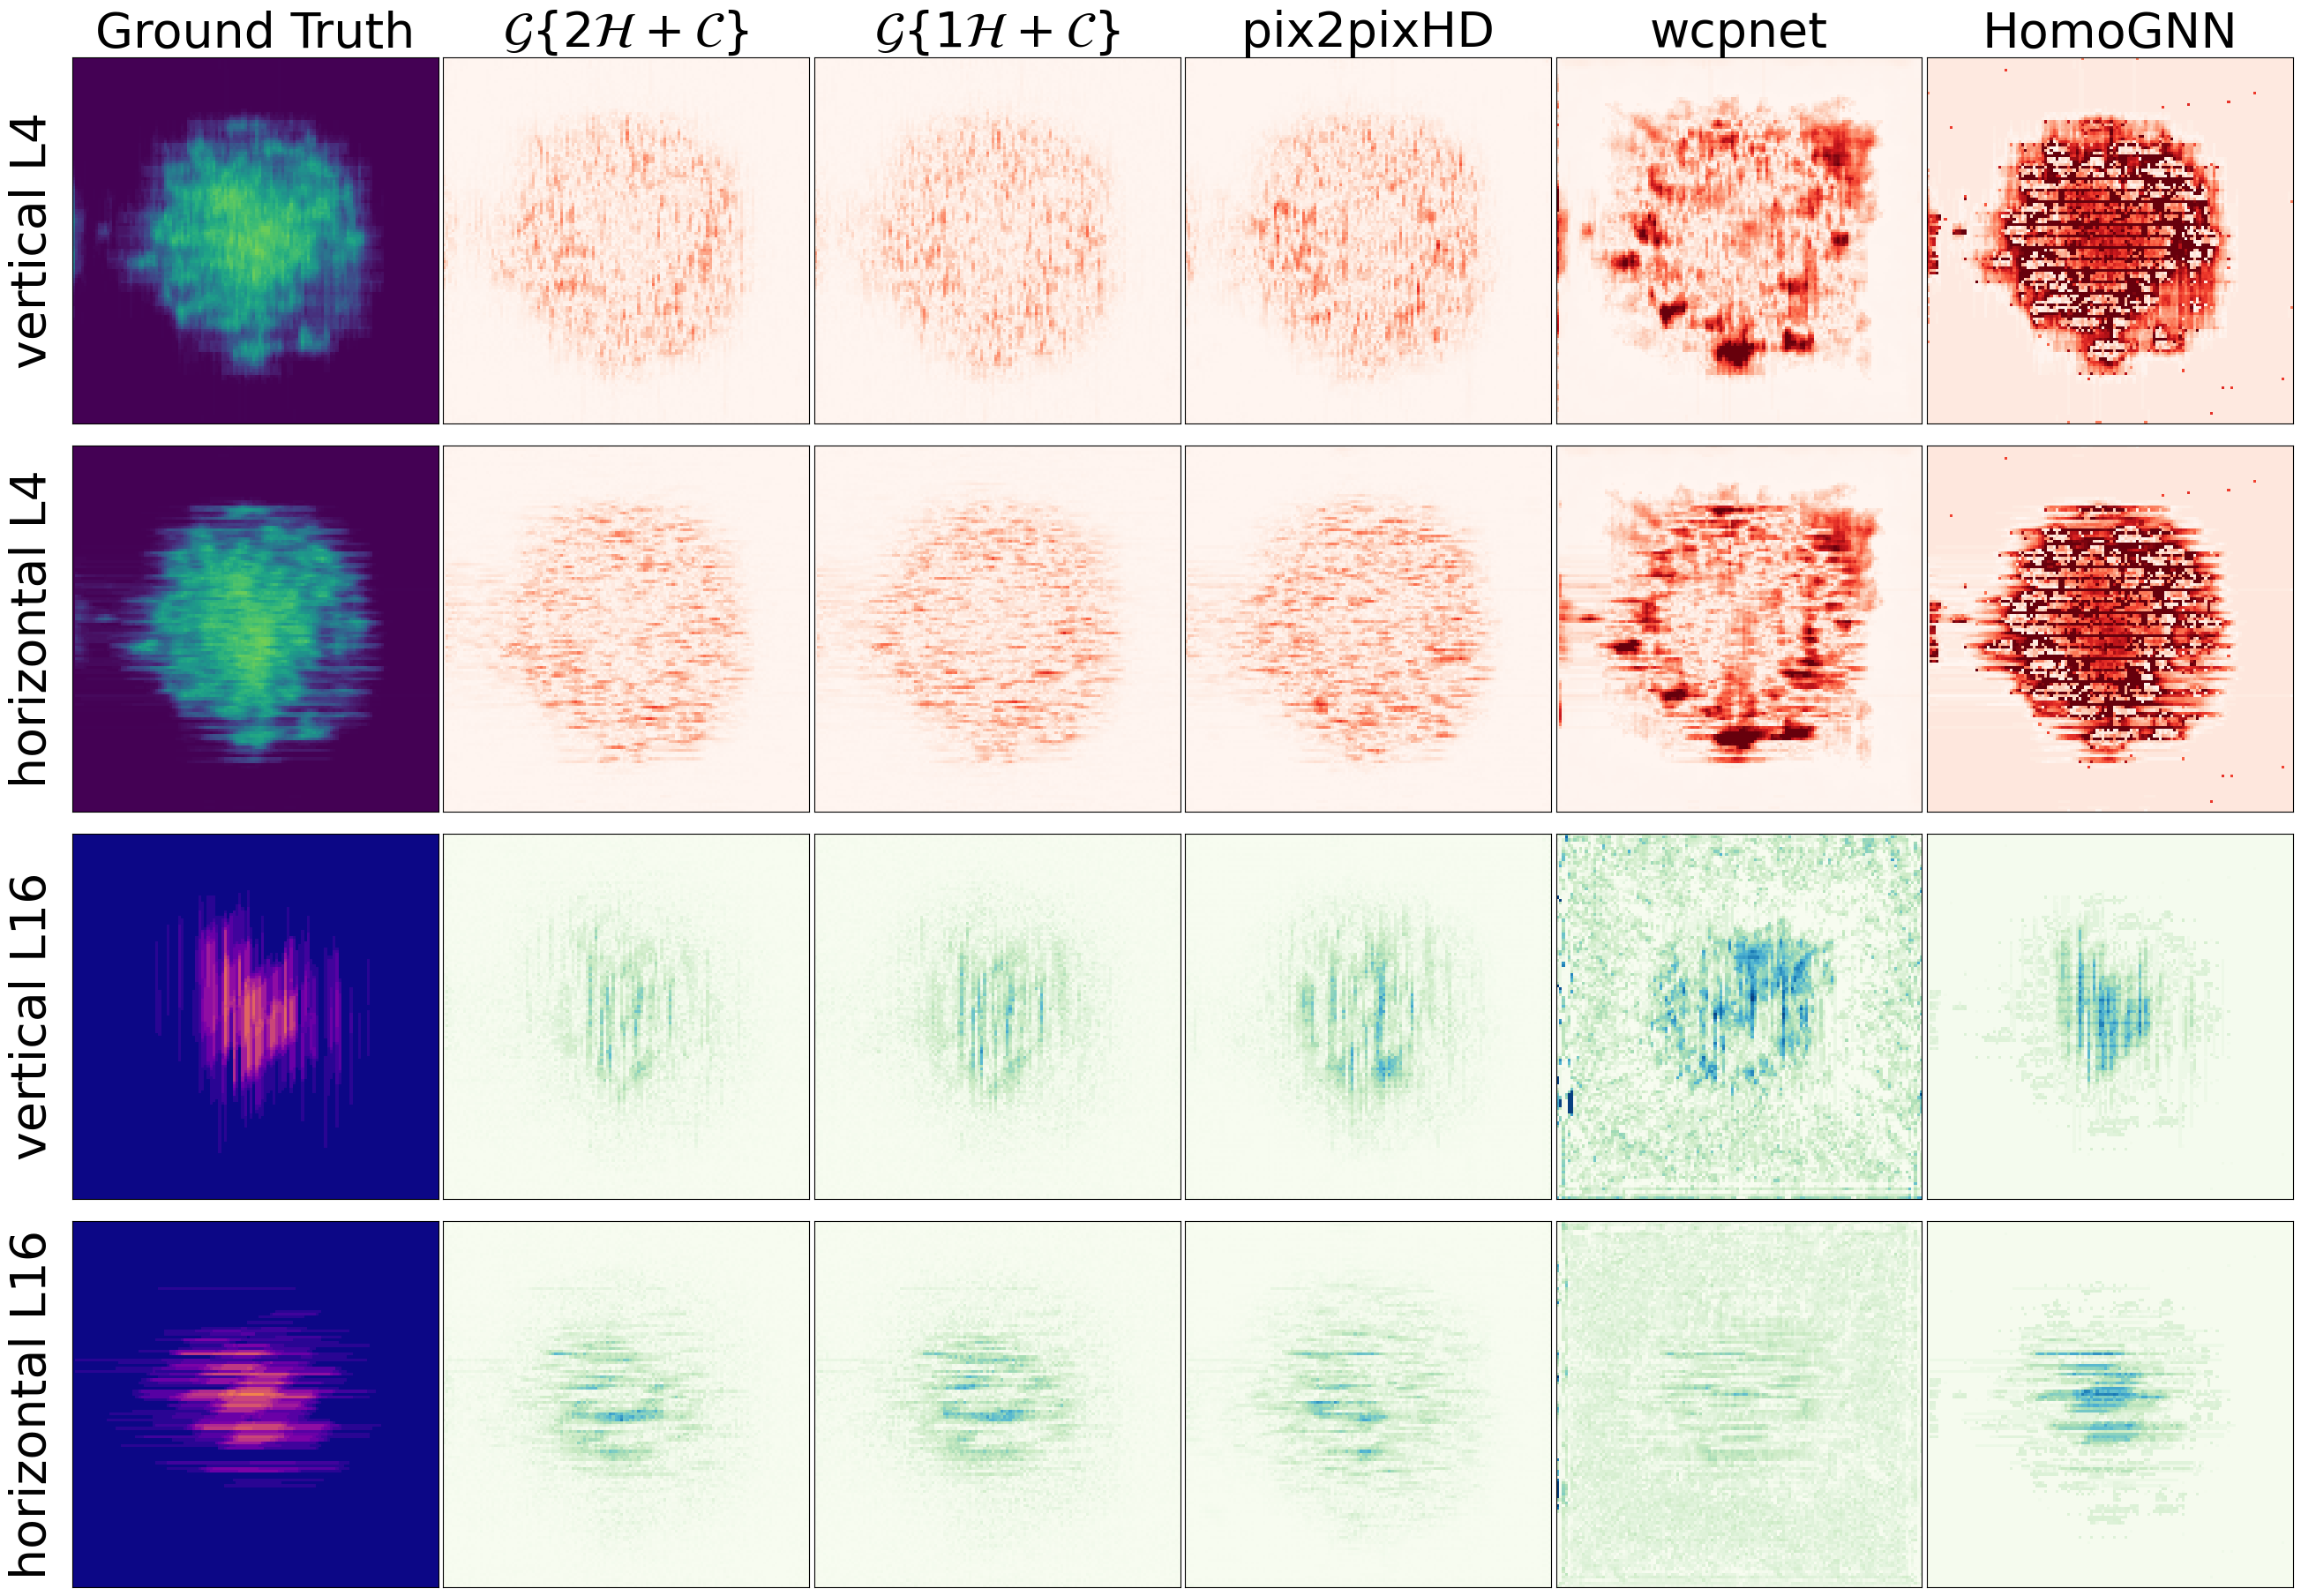

In [16]:
import os ,glob
import torch

import torch
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from IPython.display import display, Math



wire_segment_name_list = ['vertical L4 wire segment', 'horizontal L4 wire segment', 
                          'vertical L16 wire segment', 'horizontal L16 wire segment']

def visualization_grouond(torch_data, model_name, axes, idx):
    torch_data = torch_data.squeeze().permute(1, 2, 0)
    torch_data = torch_data.cpu().numpy()

    for i in range(2):
        im = axes[i,idx].matshow(torch_data[:, :, i], cmap=plt.cm.viridis, norm = Normalize(vmin=0, vmax=1.5))
        # axes[i,idx].set_title(model_name + ' ' + wire_segment_name_list[i])
        axes[i,idx].set_xticks([])  # 移除x轴刻度
        axes[i,idx].set_yticks([])  # 移除y轴刻度

    for i in range(2, 4, 1):
        im = axes[i,idx].matshow(torch_data[:, :, i], cmap=plt.cm.plasma, norm = Normalize(vmin=0, vmax=0.2))
        # axes[i,idx].set_title(model_name + ' ' + wire_segment_name_list[i])
        axes[i,idx].set_xticks([])  # 移除x轴刻度
        axes[i,idx].set_yticks([])  # 移除y轴刻度


def visualization(torch_data, model_name, axes, idx):
    torch_data = torch_data.squeeze().permute(1, 2, 0)
    torch_data = torch_data.cpu().numpy()

    for i in range(2):
        im = axes[i,idx].matshow(torch_data[:, :, i], cmap='Reds', vmax=0.5)
        # axes[i,idx].set_title(model_name + ' ' + wire_segment_name_list[i])
        axes[i,idx].set_xticks([])  # 移除x轴刻度
        axes[i,idx].set_yticks([])  # 移除y轴刻度

    for i in range(2, 4, 1):
        im = axes[i,idx].matshow(torch_data[:, :, i], cmap='GnBu', vmax=0.15)
        # axes[i,idx].set_title(model_name + ' ' + wire_segment_name_list[i])
        axes[i,idx].set_xticks([])  # 移除x轴刻度
        axes[i,idx].set_yticks([])  # 移除y轴刻度
    

CHECKPOINT_DIR= './'
benchmark_path = os.path.join(CHECKPOINT_DIR, '../../arch_blif_source/vtr7')
blifs_path = glob.glob(os.path.join(benchmark_path, '*.blif'))
BENCHMARK_LIST = [os.path.basename(path).replace('.blif', '') for path in blifs_path]

for root, dirs, files in os.walk(CHECKPOINT_DIR):
    model_name_list = dirs
    break

model_name_list =[
'2hg2cgan_sagesagegcnmean_layer2_hidden64_dnorm1_gridf1_gbe1_gle1_net1_block1',
'1hg2cgan_sagesagegcnmean_layer2_hidden64_dnorm1_gridf1_gbe1_gle1_net1_block1',
# 'fhgncnn_sagesagesagemean_layer2_hidden64_dnorm1_gridf1_gbe1_gle1_net1_block1',
'pix2pix',
# 'unet',
# 'fhgnn_sagesagesagemean_layer2_hidden64_dnorm1_gridf1_gbe1_gle1_net1_block1',
'wcpnet',
'fhgnnhomo_sagesagesagemean_layer2_hidden64_dnorm1_gridf0_gbe0_gle1_net1_block1',
]

short_model_name_list = [name.split('_', 1)[0] for name in model_name_list]

LOAD_EPOCH=200

model_num = len(short_model_name_list)
LOAD_IDX=5
print(BENCHMARK_LIST[int((LOAD_IDX-1)/2)])

real_data_path = os.path.join(CHECKPOINT_DIR, 'unet', 'eval_data', 'eval_data_real.pth')
real_img = torch.load(real_data_path)[LOAD_IDX].cpu()


fig, axes = plt.subplots(nrows=4, ncols=model_num+1, figsize=(5*model_num+1, 20))  # 创建4行1列的子图，可以根据需要调整figsize


visualization_grouond(real_img, 'ground truth', axes, 0)

for idx, model_name in enumerate(model_name_list):
    pred_data_path = os.path.join(CHECKPOINT_DIR, model_name, 'eval_data', f'eval_data_{LOAD_EPOCH}.pth')
    pred_img = torch.load(pred_data_path)[LOAD_IDX].cpu()
    visualization(abs(real_img-pred_img), short_model_name_list[idx], axes, idx+1)



titlesize=40
col_titles  = ['vertical L4', 'horizontal L4', 'vertical L16', 'horizontal L16']
row_titles  = ['Ground Truth', r'$\mathcal{G}\{{2\mathcal{H}} + \mathcal{C}\}$', \
               r'$\mathcal{G}\{{1\mathcal{H}} + \mathcal{C}\}$', \
                    'pix2pixHD','wcpnet','HomoGNN']

for ax, row_titles in zip(axes[0], row_titles):  # 假设列标题在第一行的上方
    ax.set_title(row_titles, fontsize=titlesize)
    # ax.set_title()

# 为每一行设置标题
for ax, col_titles in zip(axes[:,0], col_titles):  # 假设行标题在每行的第一列旁边
    ax.annotate(col_titles, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=titlesize, ha='right', va='center', rotation=90)

plt.tight_layout(pad=0.4, h_pad=-14)  # 自动调整子图参数，以给定的填充方式显示所有子图
plt.show()